## Finance Charts in Python Pandas 

In [21]:
import plotly.express as px
import yfinance as yf
import plotly.graph_objs as go
import pandas as pd

!pip install mplchart

## MPL Finance Demo 

https://pypi.org/project/mplchart/

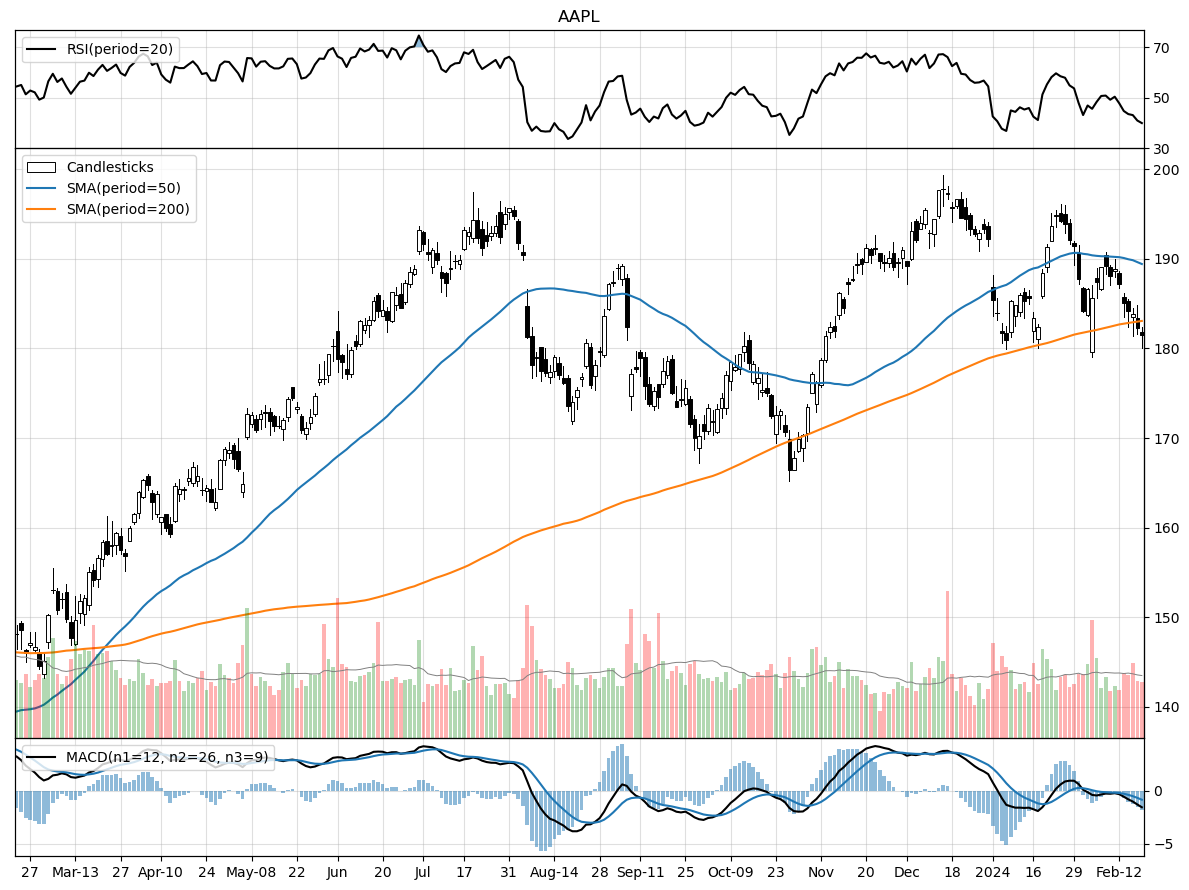

In [22]:

from mplchart.chart import Chart
from mplchart.primitives import Candlesticks, Volume
from mplchart.indicators import ROC, SMA, EMA, RSI, MACD

ticker = 'AAPL'
prices = yf.Ticker(ticker).history('5y')

max_bars = 250

indicators = [
    Candlesticks(), SMA(50), SMA(200), Volume(),
    RSI(),
    MACD(),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)

Builtin Indicators
The libary contains some basic technical analysis indicators implemented in pandas/numpy. Indicators are classes that must be instantiated before being used in the plot api.

Some of the indicators included are:

- SMA Simple Moving Average
- EMA Exponential Moving Average
- ROC Rate of Change
- RSI Relative Strength Index
- MACD Moving Average Convergence Divergence
- PPO Price Percentage Oscillator
- SLOPE Slope (linear regression with time)
- BBANDS Bolling Bands


In [24]:
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-02-21 00:00:00-05:00,41.347916,41.485098,40.986904,41.169815,68998800,0.0,0.0
2019-02-22 00:00:00-05:00,41.294960,41.636717,41.246826,41.629498,75652800,0.0,0.0
2019-02-25 00:00:00-05:00,41.915913,42.327465,41.865370,41.932758,87493600,0.0,0.0
2019-02-26 00:00:00-05:00,41.807604,42.190276,41.677638,41.956821,68280800,0.0,0.0
2019-02-27 00:00:00-05:00,41.687271,42.118077,41.571744,42.086788,111341600,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-13 00:00:00-05:00,185.770004,186.210007,183.509995,185.039993,56529500,0.0,0.0
2024-02-14 00:00:00-05:00,185.320007,185.529999,182.440002,184.149994,54630500,0.0,0.0
2024-02-15 00:00:00-05:00,183.550003,184.490005,181.350006,183.860001,65434500,0.0,0.0


In [25]:
prices['Date'] = prices.index

fig = go.Figure(data=[go.Candlestick(x=prices['Date'],
                open=prices['Open'],
                high=prices ['High'],
                low=prices['Low'],
                close=prices['Close'])])

fig.show()

In [28]:
df = px.data.stocks(indexed=True)-1
df

company,GOOG,AAPL,AMZN,FB,NFLX,MSFT
date,,,,,,
2018-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-08,0.018172,0.011943,0.061881,-0.040032,0.053526,0.015988
2018-01-15,0.032008,0.019771,0.053240,-0.029757,0.049860,0.020524
2018-01-22,0.066783,-0.019943,0.140676,0.016858,0.307681,0.066561
2018-01-29,0.008773,-0.082857,0.163374,0.018357,0.273537,0.040708
...,...,...,...,...,...,...
2019-12-02,0.216280,0.546914,0.425061,0.075997,0.463641,0.720717
2019-12-09,0.222821,0.572286,0.432660,0.038855,0.421496,0.752239
2019-12-16,0.224418,0.596800,0.453455,0.104094,0.604362,0.784896


In [29]:
fig = px.bar(df, x=df.index, y="GOOG")
fig.show()

In [26]:
# Faceted Plot
fig = px.area(df, facet_col="company", facet_col_wrap=2)
fig.show()


In [27]:
df = px.data.stocks()
fig = px.line(df, x="date", y=df.columns,
              hover_data={"date": "|%B %d, %Y"},
              title='custom tick labels')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()